# The Sparks Foundation

## Author: Sumit Kutty

### Task: Prediction using Decision Tree algorithm

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.metrics import accuracy_score, confusion_matrix
from warnings import filterwarnings as w
w('ignore')
from sklearn.tree import plot_tree
sns.set(style='darkgrid', context='talk',      
        palette=['#62C370', '#FFD166', '#EF476F'])

In [142]:
data  = pd.read_csv("Iris.csv")
data.drop('Id',axis=1,inplace = True)

In [182]:
data.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [144]:
#Checking for null values
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [145]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Pair Plot between the features

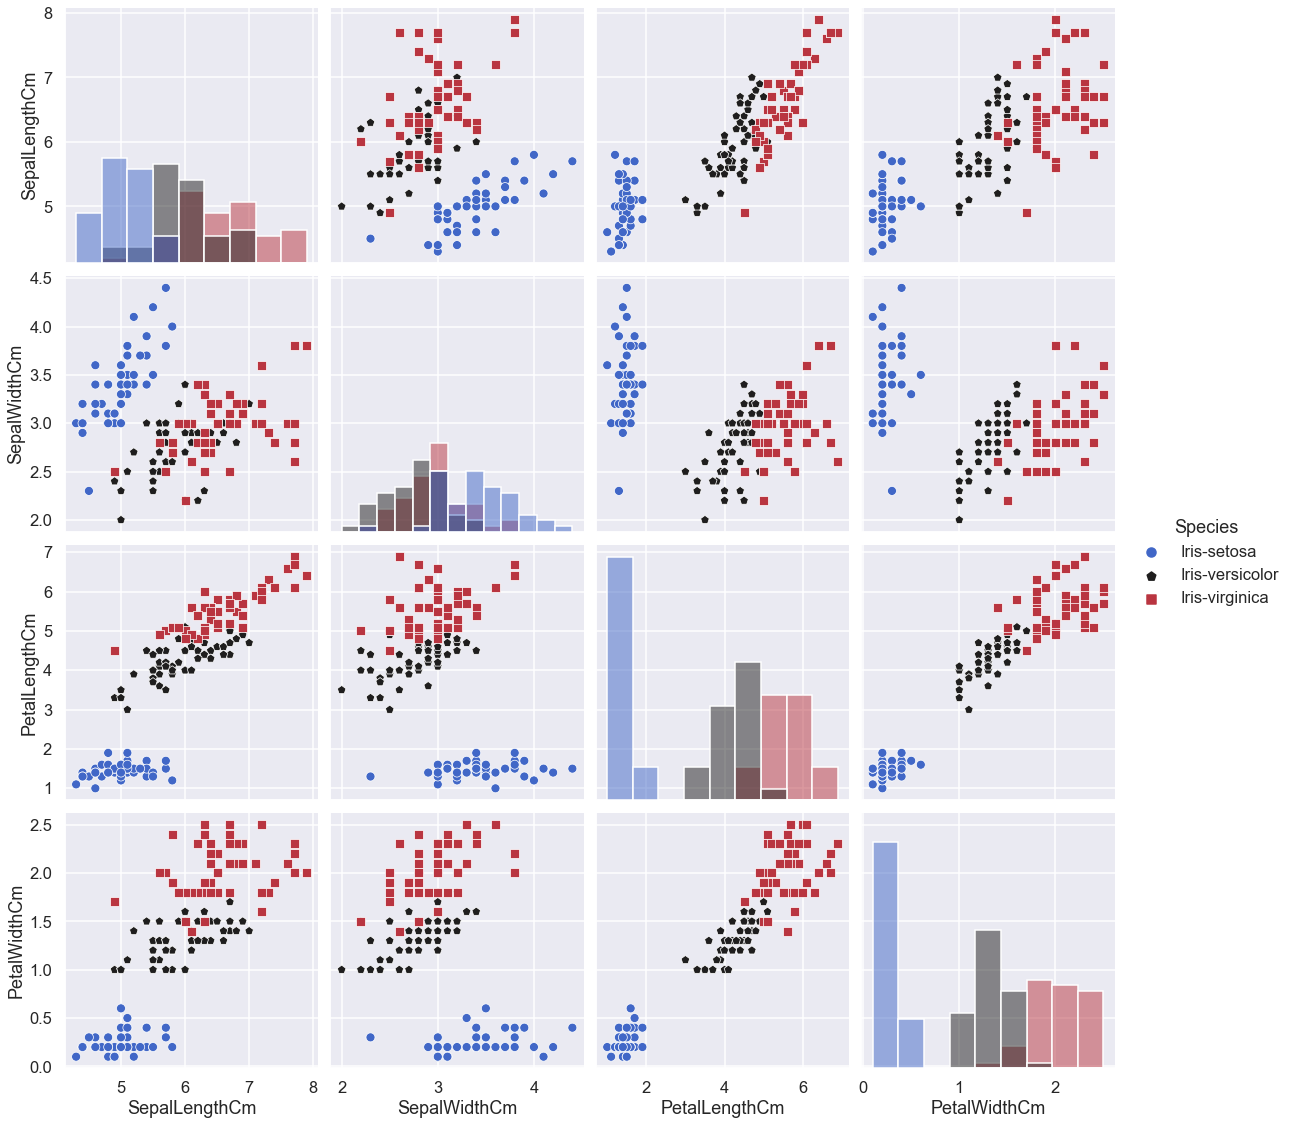

In [146]:
sns.pairplot(data, hue = 'Species', diag_kind = 'hist', palette = 'icefire', markers = ['o','p','s'], size = 4)
plt.show()

* The diagonal is the histogram of the particular feature with respect to the Class

### Box plot of all features against the labels

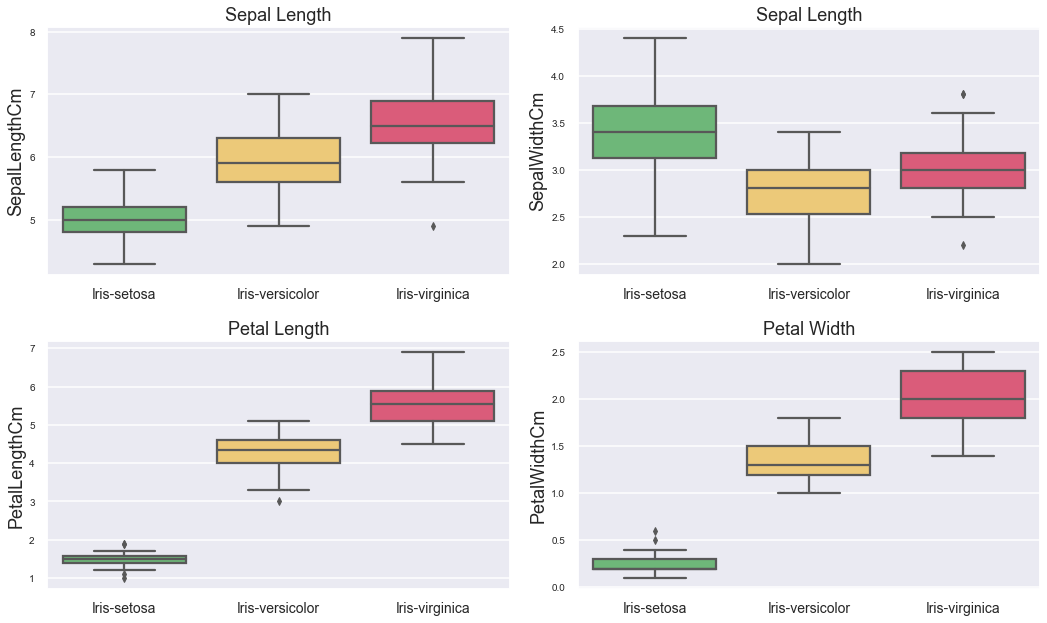

In [147]:
fig = plt.figure(figsize = (15,9))
ax1 = fig.add_subplot(221)
sns.boxplot( x = 'Species', y= 'SepalLengthCm',  data=data)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10)
plt.xlabel("")
ax1.set_title('Sepal Length', fontsize = 18)

ax2 = fig.add_subplot(222)
sns.boxplot(x = 'Species', y = 'SepalWidthCm', data=data)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10)
plt.xlabel("")
ax2.set_title('Sepal Length', fontsize = 18)

fig.tight_layout()
ax3 = fig.add_subplot(223)
sns.boxplot( x = 'Species', y= 'PetalLengthCm',  data=data)
plt.xticks(fontsize =14)
plt.yticks(fontsize = 10)
plt.xlabel("")
ax3.set_title('Petal Length', fontsize = 18)

fig.tight_layout()
ax4 = fig.add_subplot(224)
sns.boxplot( x = 'Species', y= 'PetalWidthCm',  data=data)
plt.xticks(fontsize =14)
plt.yticks(fontsize = 10)
plt.xlabel("")
ax4.set_title('Petal Width', fontsize = 18)

fig.tight_layout(rect=[0.1, 1.2, 1.8, 0.12])
plt.show()

### Pearson Correlation between the features

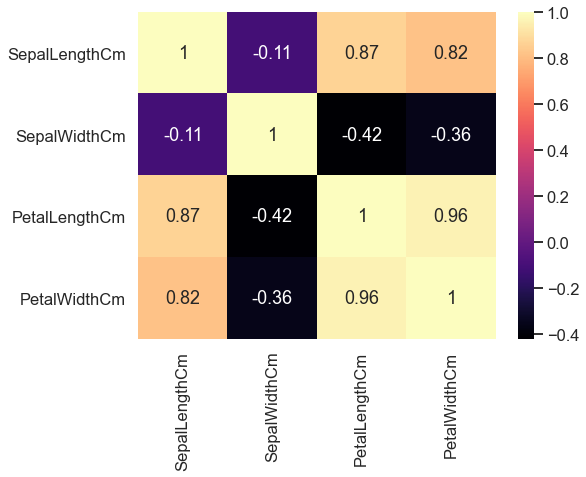

In [148]:
plt.figure(figsize = (8,6))
sns.heatmap(data.corr(), annot = True, cmap  = 'magma')
plt.show()

* Sepal Width has high negative correlation with Petal Width and Petal Length
* Sepal Length has high positive correlation with Petal Length and Petal Width

### Scatter plots of Features against the labels

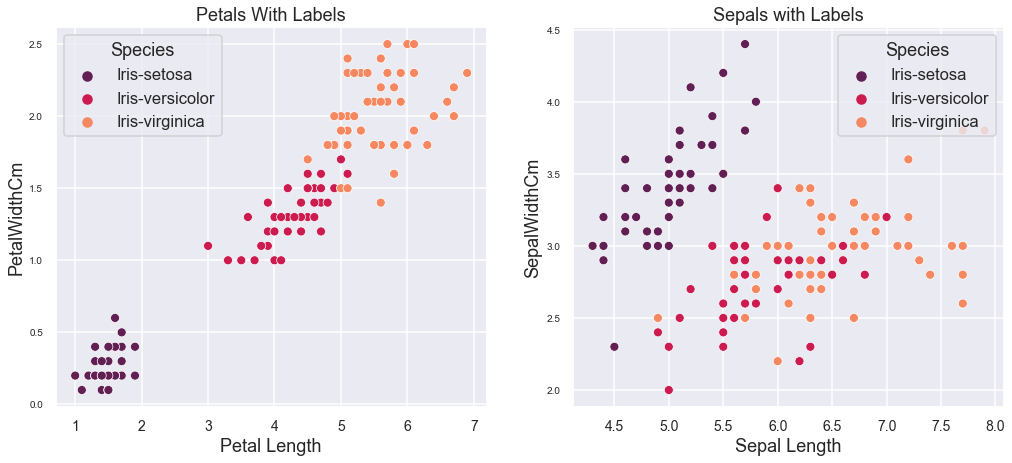

In [149]:
fig = plt.figure(figsize = (17,7))
ax1 = fig.add_subplot(121)
sns.scatterplot( x = 'PetalLengthCm', y= 'PetalWidthCm',hue = 'Species',  data=data, palette = 'rocket')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10)
plt.xlabel("Petal Length")
ax1.set_title('Petals With Labels', fontsize = 18)

ax2 = fig.add_subplot(122)
sns.scatterplot(x = 'SepalLengthCm', y = 'SepalWidthCm',hue = 'Species', data=data, palette = 'rocket')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10)
plt.xlabel("Sepal Length")
ax2.set_title('Sepals with Labels', fontsize = 18)


fig.tight_layout(rect=[0.1, 1.2, 1.8, 0.12])
plt.show()

### Class Observations

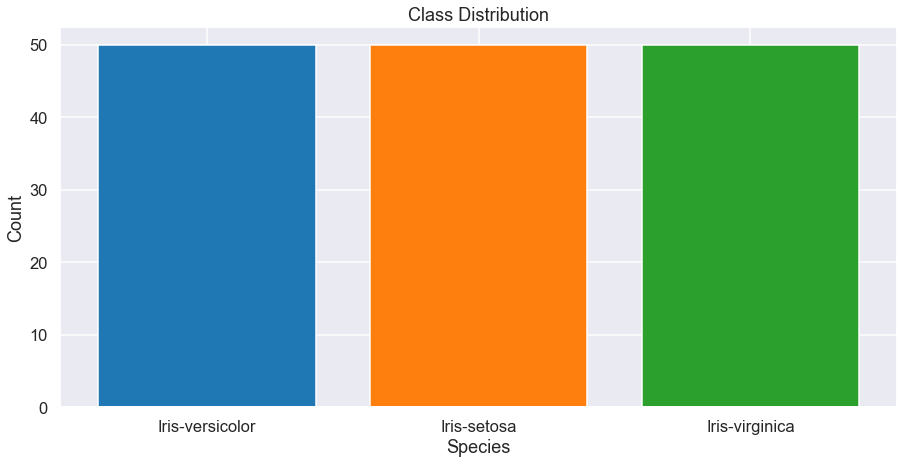

In [150]:
plt.figure(figsize = (15,7))
plt.bar(x = data['Species'].value_counts().index, height = data['Species'].value_counts(), color = sns.color_palette('tab10'))
plt.xlabel("Species")
plt.ylabel("Count")
plt.title("Class Distribution")

plt.show()

In [151]:
#Independant and Dependant variables
x = data.drop('Species', axis=1)
y = data['Species']

#Splitting into 
xtrain,xtest,ytrain, ytest = train_test_split(x,y, test_size = 0.15)

### Decision Tree Classification

In [152]:
model = dtc()
kfold = KFold(n_splits = 5, shuffle = True)
print("Average Accuracy: ", np.mean(cross_val_score(model, x,y, cv = kfold)))

Average Accuracy:  0.9400000000000001


### Hyperparameter tuning

In [153]:
params = {'criterion':['gini','entropy'], 'max_depth':[2,3,4,5,6,7,8,9,10], 'splitter':['best','random']}
grid_model = GridSearchCV(model, cv = 5, param_grid = params)
grid_model.fit(x,y)

print("Best hyperparameters: ", grid_model.best_params_)
print("Best Score: ", grid_model.best_score_)

Best hyperparameters:  {'criterion': 'gini', 'max_depth': 3, 'splitter': 'best'}
Best Score:  0.9733333333333334


### Fitting the optimal hyperparameters

The accuracy for the test set is:  1.0


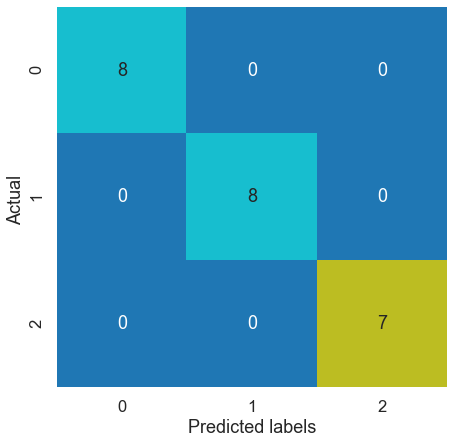

In [154]:
dt  = dtc(max_depth = 3, splitter = 'best')
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

print("The accuracy for the test set is: ", accuracy_score(ytest,ypred))

# Confusion Matrix
plt.figure(figsize = (7,7))
sns.heatmap(confusion_matrix(ytest,ypred), annot = True, cmap = 'tab10', cbar = None)
plt.xlabel("Predicted labels")
plt.ylabel("Actual ")
plt.show()

In [158]:
comp = pd.concat([pd.Series(ytest,name = 'True').reset_index(),pd.Series(ypred,name = 'Predicted').reset_index()], axis=1).drop('index',axis=1)
comp

,True,Predicted
0,Iris-virginica,Iris-virginica
1,Iris-virginica,Iris-virginica
2,Iris-versicolor,Iris-versicolor
3,Iris-versicolor,Iris-versicolor
4,Iris-versicolor,Iris-versicolor
5,Iris-setosa,Iris-setosa
6,Iris-setosa,Iris-setosa
7,Iris-setosa,Iris-setosa
8,Iris-versicolor,Iris-versicolor
9,Iris-virginica,Iris-virginica


In [183]:
#Predicting the class for a custom input
inps = input("Enter the Sepal length and width, and Petal length and widths: ")
print()
inps = np.array(inps.split(',')).astype(float)
print("The predicted species is: ", str(dt.predict([inps])))

Enter the Sepal length and width, and Petal length and widths: 6.5,3.0,5.2,2.0	

The predicted species is:  ['Iris-virginica']


### Visualising the Constructed Tree

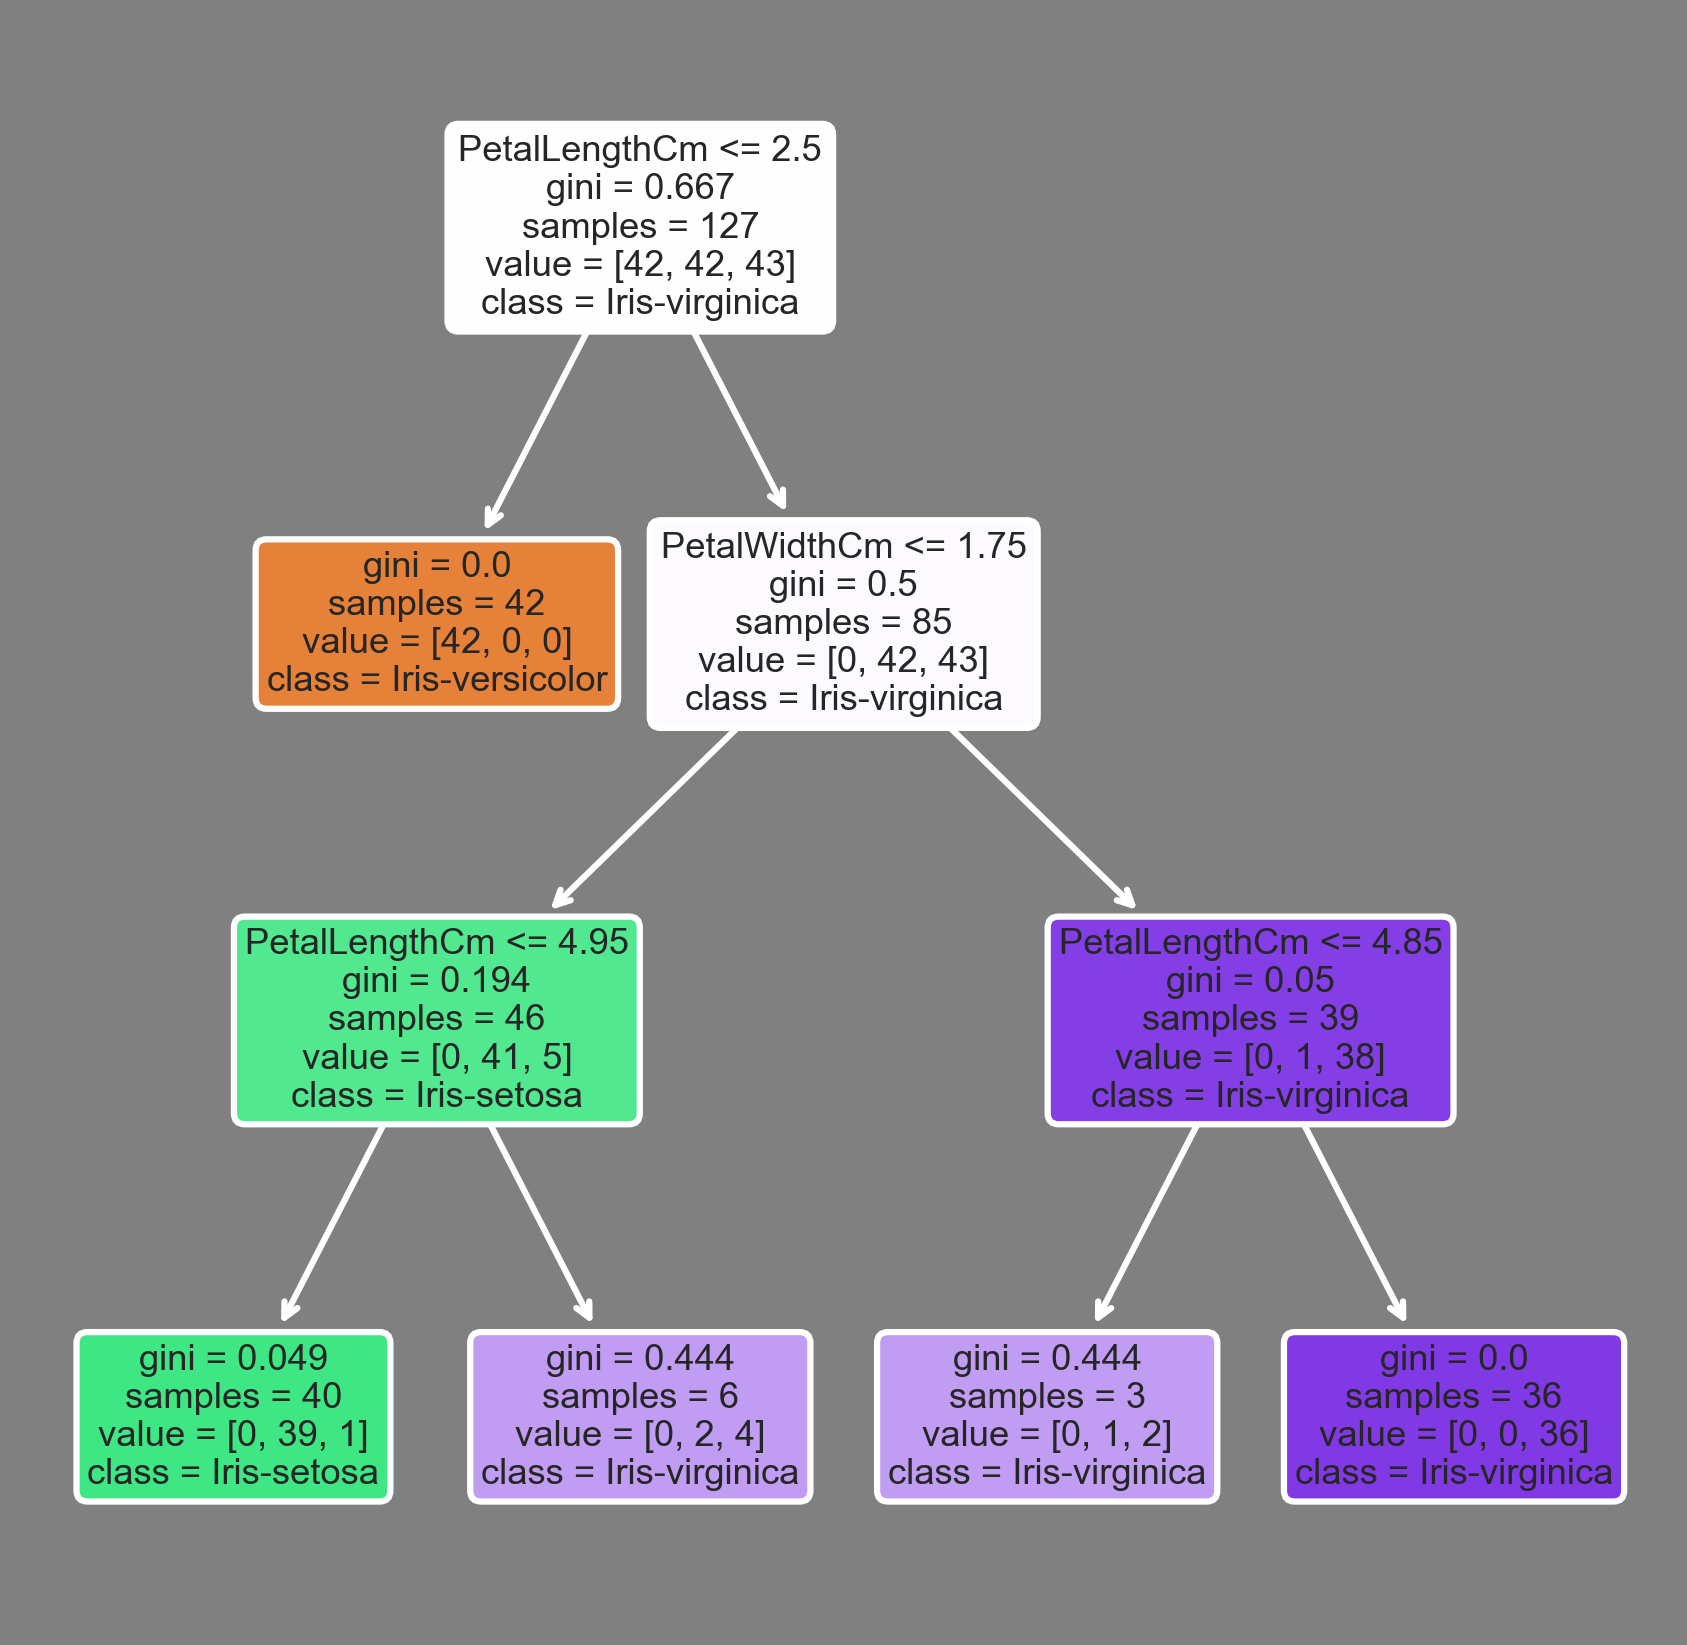

In [156]:
feats = list(x.columns)
targets = list(y.value_counts().index)
fig ,axes= plt.subplots(nrows = 1, ncols = 1, figsize = (7,7), dpi=300,facecolor = 'grey')

plot_tree(dt,feature_names = feats, class_names = targets, filled = True, rounded = True);


                 

## Thank You